## Example for structured data

In [1]:
import xgboost
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#path = "C:/Users/mran/OneDrive - University of Vaasa/Data\TobinQ_Board/"
path = "C:/Users/mikko/OneDrive - University of Vaasa/Data\TobinQ_Board/"
os.chdir(path)

FileNotFoundError: [WinError 3] Määritettyä polkua ei löydy: 'C:/Users/mikko/OneDrive - University of Vaasa/Data\\TobinQ_Board/'

In [ ]:
errors_df = pd.read_csv("AbnormalQ.csv",delimiter=";")

In [ ]:
errors_df

In [4]:
y_df = errors_df['ABN_TOBIN_PANEL']
y_df = y_df.fillna(y_df.mean())

In [5]:
x_df = errors_df[['BOARD_GENDER_DIVERSITY_P',
       'BOARD_MEETING_ATTENDANCE', 'BOARD_MEMBER_AFFILIATION',
       'BOARD_MEMBER_COMPENSATIO', 'BOARD_SIZE', 'BOARD_SPECIFIC_SKILLS_PE',
       'CEO_BOARD_MEMBER', 'CHAIRMAN_IS_EX_CEO', 'EXECUTIVE_MEMBERS_GENDER',
       'INDEPENDENT_BOARD_MEMBER', 'NON_EXECUTIVE_BOARD_MEMB',
       'NUMBER_OF_BOARD_MEETINGS', 'STRICTLY_INDEPENDENT_BOA',
       'AVERAGE_BOARD_TENURE']]
x_df = x_df.fillna(x_df.mean())

In [6]:
dtrain = xgboost.DMatrix(x_df, label=y_df)

C:\Users\mran\AppData\Local\Continuum\anaconda3\envs\Boost\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [75]:
#param = {'max_depth': 1, 'eta': 0.9}
#param = {}
param = {'max_depth': 5, 'eta': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.8}

In [77]:
## Cross-validation

In [78]:
temp = xgboost.cv(param,dtrain,num_boost_round=400,nfold=5,seed=10)

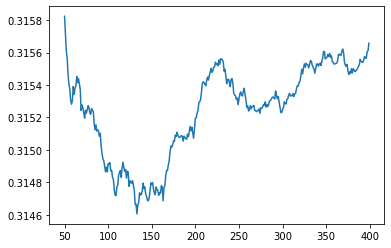

In [80]:
plt.plot(temp['test-rmse-mean'][50:400])

In [29]:
## 120 boosting rounds selected. Then the fine tuning of tree parameters.
b_rounds = 150
m_depth = 5
eta = 0.1
ssample = 0.8
col_tree = 0.8
m_child_w = 1
gam = 0.0

In [12]:
#from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search

In [13]:
# Fine tune gamma

In [15]:
#param_test3 = {'gamma':[i/10.0 for i in range(0,40)]}
#super_param = {'gamma':[i/5.0 for i in range(0,11)],'min_child_weight':range(1,8,1),
#               'subsample':[i/20.0 for i in range(15,20)],'colsample_bytree':[i/20.0 for i in range(15,20)]}

In [16]:
#super_param

In [17]:
#gsearch3 = GridSearchCV(estimator = xgboost.XGBRegressor(njobs = -1, learning_rate = eta, n_estimators=b_rounds, max_depth=m_depth,
#     min_child_weight=m_child_w, gamma = gam, subsample=ssample, colsample_bytree=col_tree,objective='reg:squarederror',seed = 12),
#            n_jobs = -1, param_grid = param_test3,iid=False, cv=5)
#gsearch3 = GridSearchCV(estimator = xgboost.XGBRegressor(njobs = -1, learning_rate = eta, n_estimators=b_rounds, max_depth=m_depth,
#     min_child_weight=m_child_w, gamma = gam, subsample=ssample, colsample_bytree=col_tree,objective='reg:squarederror',seed = 12),
#            n_jobs = -1, param_grid = super_param,iid=False, cv=5)

In [18]:
#gsearch3.fit(x_df,y_df)

In [19]:
#gsearch3.best_params_

In [20]:
#gsearch3.best_score_

In [22]:
#gam = 2.0

In [23]:
# Fine tune max_depth and min_child_weight

In [51]:
#param_test1 = {'min_child_weight':range(1,9,1),'n_estimators':range(0,200,10)}
#param_test1 = {'max_depth':range(1,5,1),'min_child_weight':range(1,9,1)}
#param_test1 = {'max_depth':range(1,5,1)}
param_test1 = {'n_estimators':range(0,200,10)}

In [60]:
gsearch1 = GridSearchCV(estimator = xgboost.XGBRegressor(njobs = -1, learning_rate = eta, n_estimators=b_rounds, max_depth=m_depth,
     min_child_weight=m_child_w, gamma = gam,subsample=ssample, colsample_bytree=col_tree,objective='reg:squarederror', seed = 10),
        n_jobs = -1, param_grid = param_test1,iid=False, cv=5)

In [61]:
gsearch1.fit(x_df,y_df)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=0.0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=5,
                                    min_child_weight=1, missing=None,
                                    n_estimators=150, n_jobs=1, njobs=-1,
                                    nthread=None, objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=10, silent=None,
                                    subsample=0.8, verbosity=1),
             iid=False, n_jobs=-1,
             param_grid={'n_estimators': range(0, 200, 10)},
             pre_dispatch='2*n_jobs', refit=

In [62]:
gsearch1.best_params_

{'n_estimators': 40}

In [63]:
gsearch1.best_score_

-0.00024709331025318804

In [33]:
m_child_w = 1
m_depth = 4

In [34]:
# Subsample and col_sample_bytree

In [20]:
param_test4 = {'subsample':[i/20.0 for i in range(15,20)],'colsample_bytree':[i/20.0 for i in range(15,20)]}

In [21]:
param_test4

{'subsample': [0.75, 0.8, 0.85, 0.9, 0.95],
 'colsample_bytree': [0.75, 0.8, 0.85, 0.9, 0.95]}

In [36]:
gsearch4 = GridSearchCV(estimator = xgboost.XGBRegressor(njobs = -1, learning_rate = eta, n_estimators=b_rounds, max_depth=m_depth,
     min_child_weight=m_child_w, gamma = gam, subsample=ssample, colsample_bytree=col_tree,objective='reg:squarederror', seed = 12),
            n_jobs = -1, param_grid = param_test4,iid=False, cv=10)

In [37]:
gsearch4.fit(x_df,y_df)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=2.0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=4,
                                    min_child_weight=1, missing=None,
                                    n_estimators=200, n_jobs=1, njobs=-1,
                                    nthread=None, objective='reg:squareder...
                                    subsample=0.8, verbosity=1),
             iid=False, n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.81, 0.82, 0.83, 0.84, 0.85,
                                              0.86, 0.87, 0.88, 0.89, 0.9, 0.91,
                                              0.92, 0.93, 0.94, 0.95, 0.96,
                         

In [38]:
gsearch4.best_params_

{'colsample_bytree': 0.86, 'subsample': 0.81}

In [39]:
gsearch4.best_score_

0.014519596373679144

In [40]:
ssample = 0.81
col_tree = 0.86

In [41]:
# Again optimizing learning rate and boosting rounds

In [111]:
b_rounds = 200
m_depth = 6
eta = 0.05
ssample = 0.8
col_tree = 0.8
m_child_w = 6
gam = 0

In [112]:
param = {'max_depth': m_depth, 'eta': eta, 'subsample': ssample, 'colsample_bytree': col_tree, 'min_child_weight' : m_child_w, 'gamma' : gam}

In [115]:
temp = xgboost.cv(param,dtrain,num_boost_round=1000,nfold=5,seed = 12)

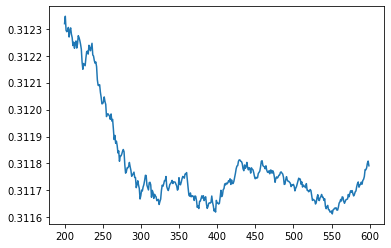

In [118]:
plt.plot(temp['test-rmse-mean'][200:600])

In [ ]:
# BEST MODEL AT THE MOMENT
#b_rounds = 400
#m_depth = 6
#eta = 0.05
#ssample = 0.8
#col_tree = 0.8
#m_child_w = 6
#gam = 0

In [119]:
bst = xgboost.train(param,dtrain,num_boost_round=400)

<BarContainer object of 81 artists>

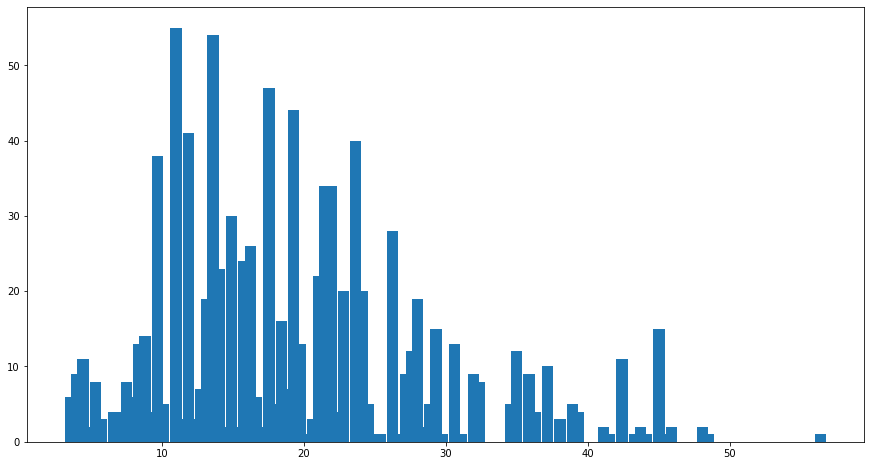

In [207]:
split_bars = bst.get_split_value_histogram(feature='BOARD_GENDER_DIVERSITY_P')
plt.bar(split_bars['SplitValue'],split_bars['Count'])